In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [0]:
#Add the csv path here
train = pd.read_csv('food1.csv')    # reading the csv file
train.head() 
print(train.dtypes)

#basically we assigned binary values to here to dictate if its a food pic or not food is 1 not food is 0 
train.label[train.label == 'inside'] = 0
train.label[train.label == 'menu'] = 0
train.label[train.label == 'outside'] = 0
train.label[train.label == 'drink'] = 0
train.label[train.label == 'food'] = 1
#create two tables to use as target labels
train['not food'] = train['label']
train['food'] = train['label']
train.head()

caption        object
photo_id       object
business_id    object
label          object
dtype: object


,caption,photo_id,business_id,label,not food,food
0,NaN,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,0,0,0
1,NaN,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,0,0,0
2,NaN,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,1,1,1
3,NaN,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,0,0,0
4,NaN,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,0,0,0


In [0]:
#Create binary table for not food column not food here is 1 and food here is 0
train['not food'].replace(0, '1',inplace=True)
train['not food'].replace(1,'0', inplace=True)
train.head()


,caption,photo_id,business_id,label,not food,food
0,NaN,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,0,1,0
1,NaN,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,0,1,0
2,NaN,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,1,0,1
3,NaN,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,0,1,0
4,NaN,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,0,1,0


In [0]:
train.columns
train.head()

,caption,photo_id,business_id,label,not food,food
0,NaN,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,0,1,0
1,NaN,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,0,1,0
2,NaN,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,1,0,1
3,NaN,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,0,1,0
4,NaN,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,0,1,0


In [0]:
train_image = []
for i in tqdm(range(train.shape[0])): #Add the test image path here
    img = image.load_img('yelp_photos/photos/'+train['photo_id'][i]+'.jpg',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1000/1000 [00:03<00:00, 297.77it/s]


In [0]:
X.shape

(1000, 200, 200, 3)

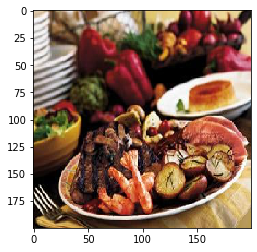

In [0]:
plt.imshow(X[2])

In [0]:
train['label'][2]
# 1 mean its a food pic 0 mean not a food pic 
#therefore the label values are consistent with the pics

1

In [0]:

#isolate not food and food to be used as the y values
y = np.array(train.drop(['business_id', 'photo_id','caption','label'],axis=1))

y.shape
#result here is consistent with our previous data we have 1000 images and two targets

(1000, 2)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
model = Sequential()
#add model layers
#input shape is 200,200, with 3 channels
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid')) #Final activation Sigmoid

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 94, 94, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        51264     
__________

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Train on 800 samples, validate on 200 samples
Epoch 1/20
800/800 [==============================] - ETA: 25s - loss: 0.1939 - acc: 0.92 - ETA: 22s - loss: 0.1801 - acc: 0.94 - ETA: 20s - loss: 0.1952 - acc: 0.93 - ETA: 18s - loss: 0.2163 - acc: 0.93 - ETA: 16s - loss: 0.1940 - acc: 0.94 - ETA: 14s - loss: 0.2008 - acc: 0.94 - ETA: 11s - loss: 0.2078 - acc: 0.93 - ETA: 9s - loss: 0.2188 - acc: 0.9209 - ETA: 7s - loss: 0.2118 - acc: 0.921 - ETA: 5s - loss: 0.2076 - acc: 0.921 - ETA: 3s - loss: 0.2178 - acc: 0.911 - ETA: 1s - loss: 0.2173 - acc: 0.914 - 28s 36ms/step - loss: 0.2165 - acc: 0.9156 - val_loss: 0.3208 - val_acc: 0.8900
Epoch 2/20
800/800 [==============================] - ETA: 24s - loss: 0.1884 - acc: 0.92 - ETA: 22s - loss: 0.2348 - acc: 0.91 - ETA: 20s - loss: 0.2500 - acc: 0.91 - ETA: 18s - loss: 0.2489 - acc: 0.91 - ETA: 15s - loss: 0.2234 - acc: 0.92 - ETA: 13s - loss: 0.2405 - acc: 0.90 - ETA: 11s - loss: 0.2324 - acc: 0.91 - ETA: 9s - loss: 0.2266 - acc: 0.9150 - ETA:

800/800 [==============================] - ETA: 25s - loss: 0.0165 - acc: 1.00 - ETA: 23s - loss: 0.0266 - acc: 1.00 - ETA: 20s - loss: 0.0385 - acc: 0.99 - ETA: 18s - loss: 0.0544 - acc: 0.98 - ETA: 16s - loss: 0.0722 - acc: 0.98 - ETA: 14s - loss: 0.0676 - acc: 0.98 - ETA: 11s - loss: 0.0665 - acc: 0.98 - ETA: 9s - loss: 0.0628 - acc: 0.9834 - ETA: 7s - loss: 0.0587 - acc: 0.983 - ETA: 5s - loss: 0.0587 - acc: 0.982 - ETA: 3s - loss: 0.0564 - acc: 0.983 - ETA: 1s - loss: 0.0636 - acc: 0.982 - 28s 36ms/step - loss: 0.0640 - acc: 0.9819 - val_loss: 0.4267 - val_acc: 0.8800
Epoch 15/20
800/800 [==============================] - ETA: 25s - loss: 0.0432 - acc: 0.98 - ETA: 23s - loss: 0.0780 - acc: 0.96 - ETA: 20s - loss: 0.0784 - acc: 0.96 - ETA: 18s - loss: 0.0919 - acc: 0.96 - ETA: 16s - loss: 0.0849 - acc: 0.96 - ETA: 14s - loss: 0.0848 - acc: 0.97 - ETA: 11s - loss: 0.0760 - acc: 0.97 - ETA: 9s - loss: 0.0771 - acc: 0.9717 - ETA: 7s - loss: 0.0747 - acc: 0.973 - ETA: 5s - loss: 0.0696

In [0]:
#load test image
img = image.load_img('test pic/hah4.jpg',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

In [0]:
proba = model.predict(img.reshape(1,200,200,3))

print(proba) #in this distribution array first element indicate the probability the pic is not a food while the second element dicate the prob. of pic being a food pic


[[0.01826851 0.9809668 ]]


Probability distribution for test picture: [0.01826851 0.9809668 ]
In the distribution above, 1st element is prob. not food pic,and the 2nd element contains the prob. food pic


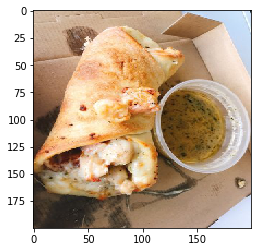

In [0]:
print("Probability distribution for test picture:", proba[0] )

print("In the distribution above, 1st element is prob. not food pic,and the 2nd element contains the prob. food pic")

plt.imshow(img)

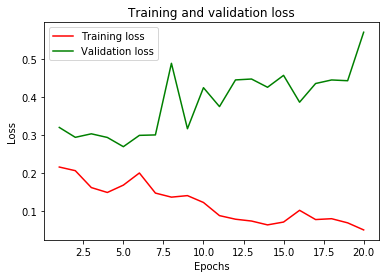

In [0]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

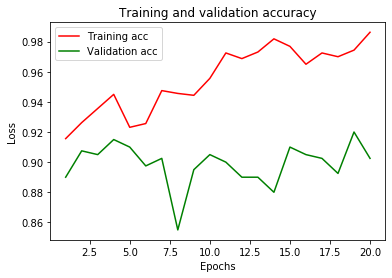

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
print("on valid data")
pred1=model.evaluate(X,y)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
1000/1000 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 9s 9ms/step
accuaracy 97.6
Total loss 13.278623521327972
